In [504]:
from nbdev.export import nb_export
nb_export('AccidentBcn.ipynb', lib_path='.', name='example')
%load_ext autoreload

%autoreload 2
sp = StreamlitPatcher()
sp.jupyter() 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [549]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import streamlit as st
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,mean_squared_error
import  pandas as pd
import  numpy as np
import time
import warnings
warnings.filterwarnings('ignore')
import streamlit.components.v1 as components
import base64

In [550]:
#default_exp


# ----- Page configs -----
st.set_page_config(
        page_title = "Fallou Fall Portfolio" ,
        page_icon = "🧪" ,
        )

# ----- Left menu -----
with st.sidebar :
   # st.image("eae_img.png" , width = 200)
    st.write(
          """Utilizing a combination of customer votes, location data, food type, delivery options, 
          and cuisine preferences, our cutting-edge model generates predictive scores to help users pinpoint
           the perfect restaurant. By analyzing these multifaceted factors, we offer tailored recommendations that
            align with individual tastes and convenience preferences. This innovative approach not only facilitates restaurant 
            discovery but also elevates overall dining experiences, ensuring users consistently find top-quality establishments 
            that cater to their specific needs and desires.""" )
    st.write(
            "Data extracted from: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants")

# ----- Title of the page -----

st.title("🌶️ Zomato Bangalore Restaurants")
st.divider()


try:
    url = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/accidents_causa_conductor_gu_bcn/resource/5a040155-38b3-4b19-a4b0-c84a0618d363/download/2023_accidents_causa_conductor_gu_bcn_.csv"
    df = pd.read_csv(url)
 
except FileNotFoundError:
    st.error("Error: Data file not found. Please check the path.")

st.dataframe(df)

st.divider()

Utilizing a combination of customer votes, location data, food type, delivery options, 
          and cuisine preferences, our cutting-edge model generates predictive scores to help users pinpoint
           the perfect restaurant. By analyzing these multifaceted factors, we offer tailored recommendations that
            align with individual tastes and convenience preferences. This innovative approach not only facilitates restaurant 
            discovery but also elevates overall dining experiences, ensuring users consistently find top-quality establishments 
            that cater to their specific needs and desires.

Data extracted from: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants

# 🌶️ Zomato Bangalore Restaurants

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,2,Febrer,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,9,Setembre,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,12,Desembre,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,1,Gener,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,NaN,Dijous,2023,11,Novembre,2,14,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8892,2023S000678,8,Nou Barris,44,Vilapicina i la Torre Llobeta,119003,Fabra i Puig,0181 0181,Divendres,2023,2,Febrer,3,17,Tarda,Avançament defectuós/improcedent,431379.36,4587039.88,2.177589,41.430147
8893,2023S006888,8,Nou Barris,44,Vilapicina i la Torre Llobeta,45701,Quinze,0068 0068,Dilluns,2023,11,Novembre,20,14,Tarda,No respectar distàncies,431122.09,4586910.29,2.174525,41.428957
8894,2023S007283,8,Nou Barris,45,Porta,256401,Pintor Alsamora,0001 0001,Divendres,2023,12,Desembre,8,6,Matí,Altres,431890.58,4587477.65,2.183657,41.434133
8895,2023S007283,8,Nou Barris,45,Porta,256401,Pintor Alsamora,0001 0001,Divendres,2023,12,Desembre,8,6,Matí,Manca d'atenció a la conducció,431890.58,4587477.65,2.183657,41.434133


DeltaGenerator()

In [551]:
df.shape

(8897, 20)

In [552]:
df.dtypes

Numero_expedient             object
Codi_districte                int64
Nom_districte                object
Codi_barri                    int64
Nom_barri                    object
Codi_carrer                   int64
Nom_carrer                   object
Num_postal                   object
Descripcio_dia_setmana       object
NK_Any                        int64
Mes_any                       int64
Nom_mes                      object
Dia_mes                       int64
Hora_dia                      int64
Descripcio_torn              object
Descripcio_causa_mediata     object
Coordenada_UTM_X_ED50       float64
Coordenada_UTM_Y_ED50       float64
Longitud_WGS84              float64
Latitud_WGS84               float64
dtype: object

In [553]:
df.isna().sum()

Numero_expedient            0
Codi_districte              0
Nom_districte               0
Codi_barri                  0
Nom_barri                   0
Codi_carrer                 0
Nom_carrer                  0
Num_postal                  4
Descripcio_dia_setmana      0
NK_Any                      0
Mes_any                     0
Nom_mes                     0
Dia_mes                     0
Hora_dia                    0
Descripcio_torn             0
Descripcio_causa_mediata    0
Coordenada_UTM_X_ED50       0
Coordenada_UTM_Y_ED50       0
Longitud_WGS84              0
Latitud_WGS84               0
dtype: int64

In [554]:
df.duplicated().sum()

0

In [555]:
barrio = df['Nom_barri'].value_counts().nlargest(30).sort_values(ascending=True)
fig = px.bar(x=barrio.values, y=barrio.index, orientation='h',width = 800,height = 600,
             labels={'x': 'Accident', 'y': 'TOP Barrio'},
             title='Top 20  Barrio Accidents',
             color=barrio.index, color_continuous_scale=['deepskyblue']*len(barrio.index),
             color_discrete_sequence=px.colors.qualitative.Pastel*len(barrio.index),
             )
fig


In [556]:
top_N = 10
top_causes = df['Descripcio_causa_mediata'].value_counts().nlargest(top_N)
colors = px.colors.qualitative.Pastel[:top_N]

color_map = {category: color for category, color in zip(top_causes.index, colors)}
fig = px.histogram(df[df['Descripcio_causa_mediata'].isin(top_causes.index)], 
                   x='Descripcio_causa_mediata', 
                   title=f"Top {top_N} Causas",
                   height=650, width=900,
                   color='Descripcio_causa_mediata',
                   color_discrete_map=color_map)

fig.show()

In [557]:
mes_count = df['Nom_mes'].value_counts().sort_index()
colors = px.colors.qualitative.Pastel[:len(mes_count)]
color_map = {category: color for category, color in zip(mes_count.index, colors)}

fig = px.bar(x=mes_count.index, y=mes_count.values, 
             labels={'x': 'Nom_mes', 'y': 'Accident'},
             title='Nom_mes Mas Accident',
             height=500, width=800,
             color=mes_count.index,  
             color_discrete_map=color_map)

fig.show()

In [558]:
horaire = df['Hora_dia'].value_counts().sort_index()
colors = px.colors.qualitative.Pastel[:len(horaire)]
color_map = {category: color for category, color in zip(horaire.index, colors)}

# Create the bar chart
fig = px.bar(x=horaire.index, y=horaire.values, 
             labels={'x': 'Horaire', 'y': 'Accident'},
             title='Hora_dia Mas Accident',
             height=500, width=800,
             color_discrete_sequence=colors)  # Using color_discrete_sequence

fig.show()

In [559]:
turnover_counts = df['Descripcio_torn'].value_counts()
colors = px.colors.qualitative.Pastel[:len(turnover_counts)]
# Create pie chart
fig = px.pie(values=turnover_counts.values, 
             names=turnover_counts.index, 
             title='Tiempo  Mas Accidentes',
             color_discrete_sequence=colors,
             hole=0.3)

fig.show()

In [560]:
#i connot add the size and the color so i create a new colum named reviews of the accicdent 
df['stars'] = pd.Series(range(1, len(df) + 1)) % 5 + 1
df


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,...,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84,stars
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,...,Febrer,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783,2
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,...,Setembre,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598,3
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,...,Desembre,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783,4
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,...,Gener,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762,5
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,NaN,Dijous,2023,...,Novembre,2,14,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8892,2023S000678,8,Nou Barris,44,Vilapicina i la Torre Llobeta,119003,Fabra i Puig,0181 0181,Divendres,2023,...,Febrer,3,17,Tarda,Avançament defectuós/improcedent,431379.36,4587039.88,2.177589,41.430147,4
8893,2023S006888,8,Nou Barris,44,Vilapicina i la Torre Llobeta,45701,Quinze,0068 0068,Dilluns,2023,...,Novembre,20,14,Tarda,No respectar distàncies,431122.09,4586910.29,2.174525,41.428957,5
8894,2023S007283,8,Nou Barris,45,Porta,256401,Pintor Alsamora,0001 0001,Divendres,2023,...,Desembre,8,6,Matí,Altres,431890.58,4587477.65,2.183657,41.434133,1
8895,2023S007283,8,Nou Barris,45,Porta,256401,Pintor Alsamora,0001 0001,Divendres,2023,...,Desembre,8,6,Matí,Manca d'atenció a la conducció,431890.58,4587477.65,2.183657,41.434133,2


In [561]:
#i calculate the number of accident for each district and add it to the dataframe
df['district_appearance'] = df.groupby('Codi_districte')['Codi_districte'].transform('count')



In [542]:
df.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes',
       'Hora_dia', 'Descripcio_torn', 'Descripcio_causa_mediata',
       'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud_WGS84',
       'Latitud_WGS84', 'stars', 'district_appearance'],
      dtype='object')

In [543]:

px.set_mapbox_access_token("pk.eyJ1Ijoic25vd21hbjIxIiwiYSI6ImNsdW9ueHU1MjA3NzUyaXI5bTV3NXlja3AifQ.Q3KozS09j8cSaQs-hMHgQQ")
fig = px.scatter_mapbox(df, 
                        lat="Latitud_WGS84", 
                        lon="Longitud_WGS84", 
                        color="stars", 
                        size='district_appearance', 
                        size_max=4, 
                        zoom=13, 
                        width=1200, 
                        height=800)

fig.update_traces(marker=dict(color='red'))
fig.show()

In [562]:
data = df[['Longitud_WGS84', 'Latitud_WGS84']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

k = 5  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=5, random_state=42)

In [563]:
coords = df[['Longitud_WGS84','Latitud_WGS84']]
distortions = []
K = range(1,5)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)


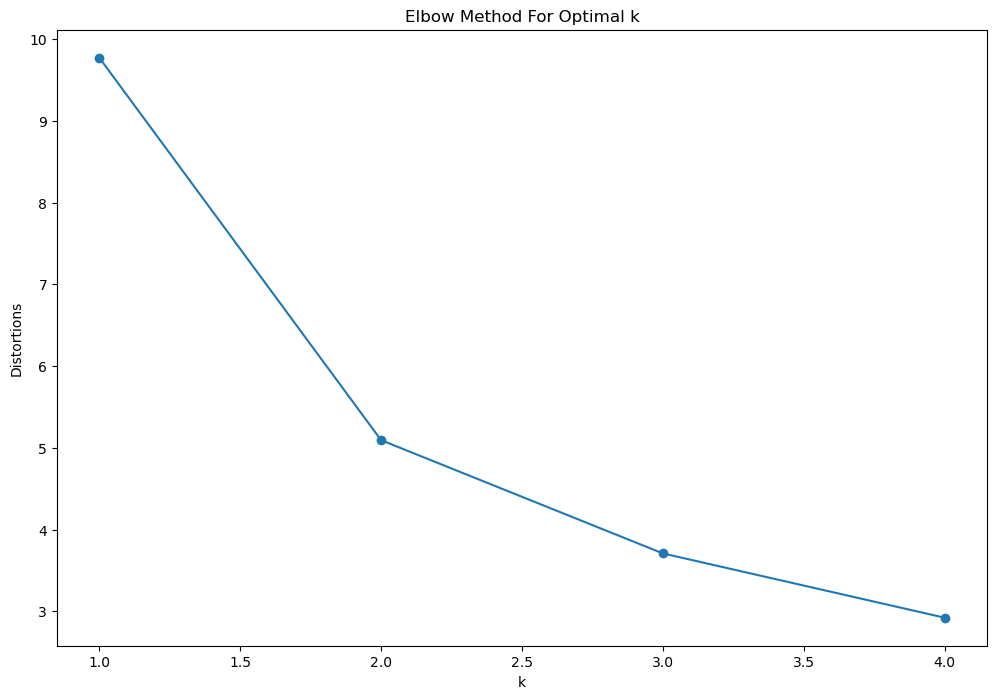

In [564]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
# plt.savefig('elbow.png')
plt.show()

In [577]:
df['cluster'] = kmeans.labels_


fig = px.scatter_mapbox(df, lat='Latitud_WGS84', lon='Longitud_WGS84', color='cluster', 
                        color_continuous_scale=px.colors.qualitative.Light24,
                        zoom=10, height=600,width = 800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Clustering of Accident Data')
fig

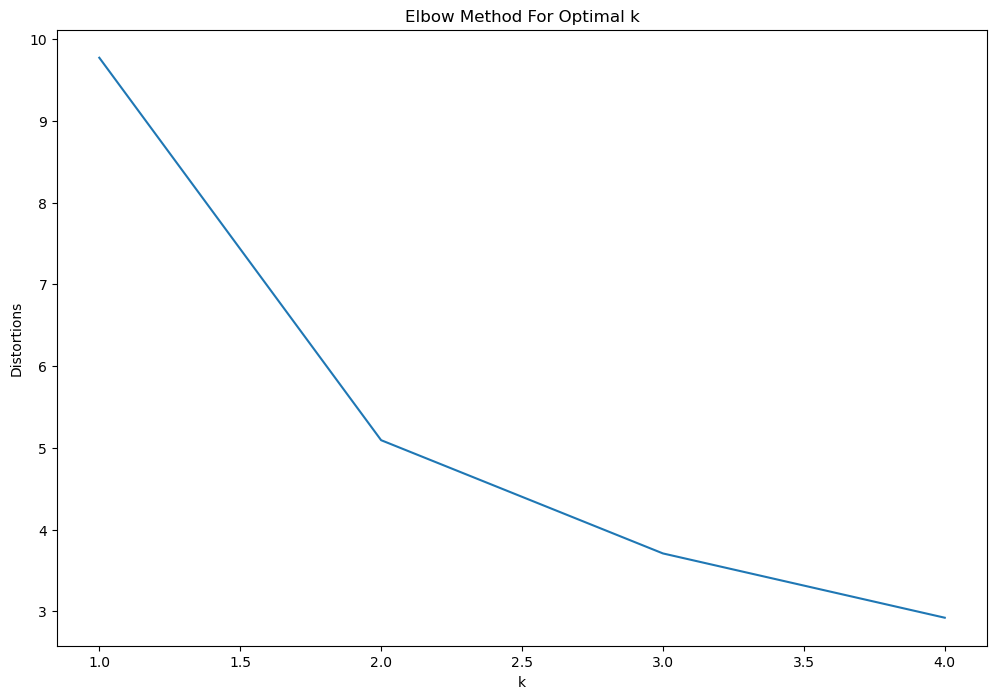

In [523]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

In [481]:
sil

[0.4089545319143324,
 0.35524163312008106,
 0.3574580571261764,
 0.3574395615828786,
 0.3727260758130421,
 0.35651698024477013,
 0.3713309019889375,
 0.36708639224577116,
 0.3576097632309278,
 0.35408907325172073,
 0.3616081918173953,
 0.35943965448554394,
 0.3449945306699944,
 0.35751574944356523,
 0.350696761040724,
 0.3724584316443538,
 0.3725239829294129,
 0.36922617120095985,
 0.3688059330607439,
 0.37506789771192844,
 0.36408956996881336,
 0.3635284586174611,
 0.3649931491583948,
 0.3687467771775354,
 0.3654923027264753,
 0.36849271641000486,
 0.3664767714070405,
 0.3681809197820288,
 0.372221034613972,
 0.37068609425611043,
 0.37115763594370205,
 0.371797977519237,
 0.3690360616267281,
 0.37469274418017295,
 0.3733499616238643,
 0.3807147673503265,
 0.3748758732624181,
 0.37758351222826414,
 0.37739233242534076,
 0.37581723036482945,
 0.38392579047902164,
 0.383816727617563,
 0.3837222539526233,
 0.3739620746494061,
 0.37509517920934554,
 0.3768895780317562,
 0.3754548849842053,

In [480]:


kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

k = 5  silhouette_score  0.4088852655402174


In [356]:
df['cluster'] = kmeans.predict(df[['Longitud_WGS84','Latitud_WGS84']]) # predict cluster of accident
df.head(20)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,...,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84,stars,district_appearance,cluster,total_accidents_district
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,...,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783,2,104,4,104
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,...,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598,3,104,3,104
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,...,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783,4,104,4,104
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,...,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762,5,104,3,104
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,NaN,Dijous,2023,...,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587,1,104,1,104
5,2023S002721,-1,Desconegut,-1,Desconegut,-1,Lisboa ...,68-72,Dilluns,2023,...,Nit,Manca d'atenció a la conducció,429524.58,4586879.70,2.155411,41.428543,2,104,3,104
6,2023S002864,-1,Desconegut,-1,Desconegut,-1,Lisboa / Puríssima ...,NaN,Dissabte,2023,...,Tarda,Desobeir altres senyals,429178.93,4586631.06,2.151304,41.426273,3,104,3,104
7,2023S006867,-1,Desconegut,-1,Desconegut,-1,Guipúscoa ...,163,Diumenge,2023,...,Matí,Manca d'atenció a la conducció,433835.76,4586344.61,2.207062,41.424091,4,104,0,104
8,2023S001077,-1,Desconegut,-1,Desconegut,-1,Carrasco i Formiguera / Dolors Monserdà ...,NaN,Dimecres,2023,...,Tarda,Desobeir altres senyals,426738.14,4583956.28,2.122420,41.401964,5,104,1,104
9,2023S005671,-1,Desconegut,-1,Desconegut,-1,A Zona Franca ...,93,Dimarts,2023,...,Tarda,Manca d'atenció a la conducció,428497.71,4577319.47,2.144251,41.342347,1,104,2,104


In [487]:
def drivesafe(df, longitude, latitude):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    return  df[df['cluster']==cluster].iloc[0:5][['Nom_carrer','Nom_barri', 'Latitud_WGS84','Longitud_WGS84','cluster']]
   

In [488]:
drivesafe(df,2.12251256792347,  36.1017316)

,Nom_carrer,Nom_barri,Latitud_WGS84,Longitud_WGS84,cluster
7,Guipúscoa ...,Desconegut,41.424091,2.207062,1
13,Meridiana,el Camp de l'Arpa del Clot,41.413521,2.186892,1
14,Las Navas de Tolosa,el Camp de l'Arpa del Clot,41.415454,2.186488,1
15,Las Navas de Tolosa,el Camp de l'Arpa del Clot,41.415285,2.186890,1
16,Independència,el Camp de l'Arpa del Clot,41.412563,2.177294,1
